## This notebook illustrates unfolding using the RooUnfold methods 

In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

rc('text', usetex=True)

Welcome to JupyROOT 6.15/01


In [2]:
ROOT.gInterpreter.ProcessLine('#include "MyTUnfoldDensity.h"')


0L

In [3]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [4]:
def getJetData(inputFiles, isMC=False):
    
    cols = []
    scalar = []
  
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')

    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')

    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('jet_qt')
    cols.append('jet_dphi')
    cols.append('jet_z')
    
    if(isMC):
        cols.append('genjet_p')
        cols.append('genjet_pt')
        cols.append('genjet_qt')
        cols.append('genjet_dphi')
        cols.append('genjet_z')

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [5]:
def printSummary(df):
    print df['e_pt'].mean(), ' mean lepton pt'
    print df['y'].mean(), ' mean inelasticity'
    print df['jet_p'].mean(), ' mean jet p'
    print df['jet_pt'].mean(), ' mean jet pT'
    print df['jet_pt'].describe()

    print df['x'].mean(), ' mean x'
    print df['Q2'].mean(), ' mean Q2'
    print df['Q2'].describe()
    return

In [6]:
def getData(inputFiles):
    
    cols = []
    scalar = []  
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')

    
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [7]:
def applyCuts(df):
    temp = df
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>10', 'e_pt >10')
    #temp = applyCut(temp, 'x > 0.05', 'x>0.05')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    return temp

In [8]:
def applyCutsJets(df,isMC=False):
    temp = df
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>10', 'e_pt >10')
    temp = applyCut(temp, 'jet_pt>5', 'jet_pt>5')
    #temp = applyCut(temp, 'jet_qt<5', 'jet_qt<5')

    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    
    #temp.eval('dphi = 3.14159-jet_dphi', inplace=True)
    temp.eval('jet_qtnormjetpt= jet_qt/jet_pt', inplace=True)
    temp.eval('jet_qtnormept= jet_qt/e_pt', inplace=True)
    if(isMC):
        temp.eval('genjet_qtnormept= genjet_qt/e_pt', inplace=True)
        temp.eval('genjet_qtnormjetpt= genjet_qt/genjet_pt', inplace=True)


    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

In [9]:
df = getData(['data.root'])
df = applyCuts(df)

mc = getData(['mc.root'])
mc = applyCuts(mc)


Processed data.root in 0.3 seconds
0.2 < y < 0.7 170849  fraction kept: 100.0
Q2>150 170849  fraction kept: 100.0
e_pt >10 137246  fraction kept: 80.3

Processed mc.root in 0.1 seconds
0.2 < y < 0.7 118567  fraction kept: 100.0
Q2>150 118567  fraction kept: 100.0
e_pt >10 97889  fraction kept: 82.6


In [10]:
df_jet      = getJetData(['data.root'])
df_jet = applyCutsJets(df_jet)

mc_jet = getJetData(['mc.root'],isMC=True)
mc_jet = applyCutsJets(mc_jet, isMC=True)


Processed data.root in 2.4 seconds
0.2 < y < 0.7 82882  fraction kept: 100.0
Q2>150 82882  fraction kept: 100.0
e_pt >10 70103  fraction kept: 84.6
jet_pt>5 70103  fraction kept: 100.0

Processed mc.root in 3.2 seconds
0.2 < y < 0.7 145313  fraction kept: 100.0
Q2>150 145313  fraction kept: 100.0
e_pt >10 125072  fraction kept: 86.1
jet_pt>5 125072  fraction kept: 100.0


In [11]:
coarsebins = 10
finebins = 10
#minval = 2.5
#maxval = np.pi
#variable    = 'jet_dphi' 
#genvariable = 'genjet_dphi'

#minval = 0.0
#maxval = 10
#variable = 'jet_qt'
#genvariable = 'genjet_qt'

#minval = 0.0 
#maxval = 1.0
#variable = 'jet_qtnormept'
#genvariable = 'genjet_qtnormept'

minval = 0.0
maxval = 0.50
variable = 'jet_qtnormjetpt'
genvariable = 'genjet_qtnormjetpt'



M = ROOT.TH2D("M", "Response Matrix", coarsebins,minval,maxval, finebins,minval,maxval)
M1 = M.Clone("M1")
M2 = M.Clone("M2")
M1.SetTitle("+1#sigma")
M2.SetTitle("-1#sigma")

scaleup = 1.001
scaledn = 0.999

eptmin = 15
eptmax = 20

In [12]:
data_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(eptmin,eptmax))
mc_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(eptmin,eptmax))
print len(mc_cut)
msk = np.random.rand(len(mc_cut)) < 0.5
mctest_cut = mc_cut[msk]
mc_cut   = mc_cut[~msk]
print len(mctest_cut)
print len(mc_cut)

29316
14819
14497


<function matplotlib.pyplot.hist>

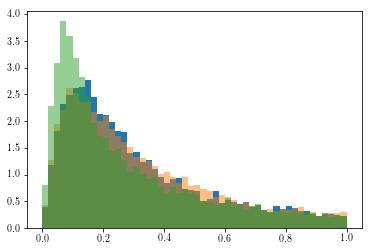

In [13]:
plt.hist(data_cut[variable],range=(0,1),bins=50,normed=True)
plt.hist(mc_cut[variable],range=(0,1),bins=50,normed=True,alpha=0.5)
plt.hist(mc_cut[genvariable],range=(0,1),bins=50, normed=True,alpha=0.5)

plt.hist

(array([2.18029821, 4.47808398, 3.52914564, 2.41301415, 1.89109817,
        1.47763182, 1.26299187, 1.07546292, 0.83371019, 0.85856283]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ],
       dtype=float32),
 <a list of 10 Patch objects>)

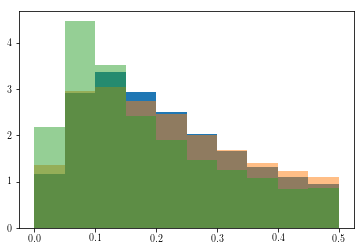

In [14]:
plt.hist(data_cut[variable],range=(0,maxval),bins=coarsebins,normed=True)
plt.hist(mc_cut[variable],range=(0,maxval),bins=coarsebins,normed=True,alpha=0.5)
plt.hist(mc_cut[genvariable],range=(0,maxval),bins=coarsebins, normed=True,alpha=0.5)


In [15]:
Npe = len(mc_cut[variable])

for i in np.arange(len(mc_cut[variable])):
    x = mc_cut.iloc[i][variable]
    y = mc_cut.iloc[i][genvariable]
    M.Fill(x, y, 1./Npe)
#
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='MC reco',histtype='step',lw=2)


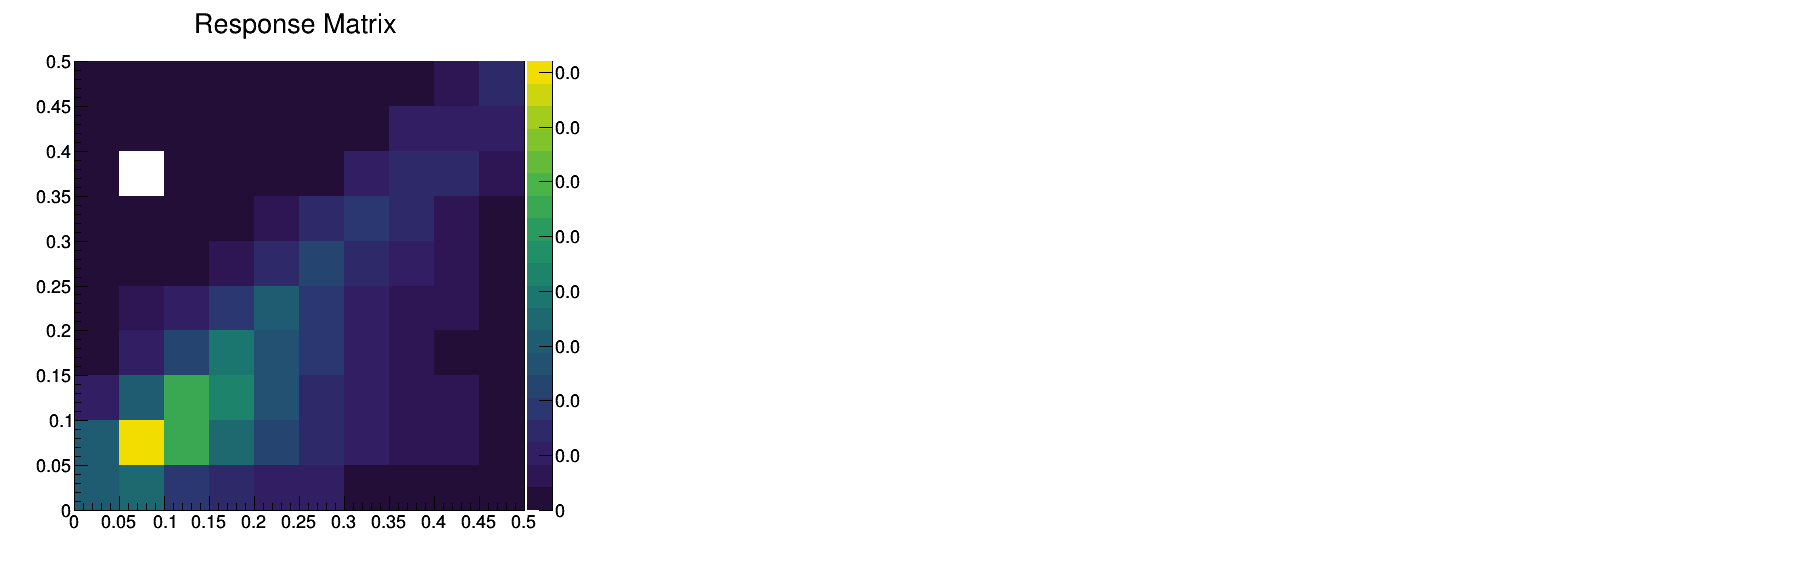

In [16]:
ROOT.gStyle.SetOptStat("")
ROOT.gStyle.SetPalette(ROOT.kViridis);
ROOT.gStyle.SetTitleYOffset(0.85)
ROOT.gStyle.SetEndErrorSize(10)


c0 = ROOT.TCanvas("c0", "c0", 1800, 600)
c0.Divide(3,1)
c0.cd(1)
M.Draw("colz")
c0.Draw()

In [17]:
h_mcreco = ROOT.TH1D("h_mcreco", "h_mcreco", finebins, minval, maxval)
h_mctrue = ROOT.TH1D("h_mctrue", "h_mctrue", finebins, minval, maxval)

   
for i in np.arange(len(mc_cut[variable])):
    h_mctrue.Fill(mc_cut.iloc[i][genvariable])
    h_mcreco.Fill(mc_cut.iloc[i][variable])


In [18]:
h_fakedata = ROOT.TH1D("h_fakedata", "h_fakedata", finebins, minval, maxval)   
    
for i in np.arange(len(mctest_cut[variable])):
    h_fakedata.Fill(mctest_cut.iloc[i][variable])
    
    
    
h_data = ROOT.TH1D("h_data", "h_data", finebins, minval, maxval)   
for i in np.arange(len(data_cut[variable])):
    h_data.Fill(data_cut.iloc[i][variable])

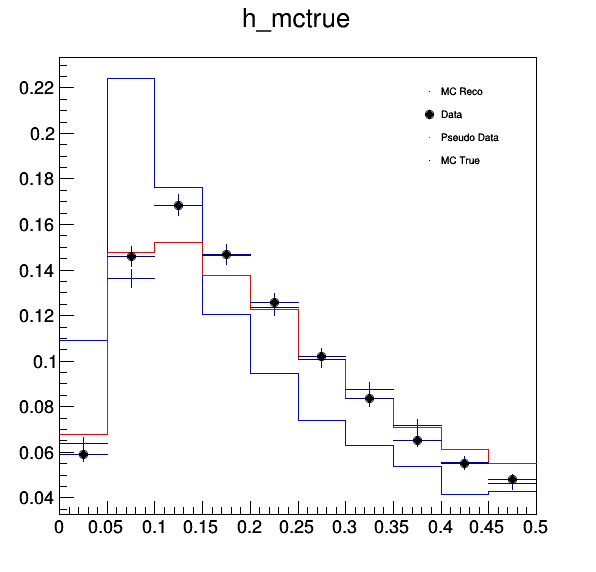

In [19]:
#h_mcreco.SetMarkerStyle(20)
h_data.SetMarkerStyle(20)
h_data.SetMarkerColor(ROOT.kBlack)
#h_mctrue.SetMarkerStyle(21)
h_fakedata.SetMarkerColor(ROOT.kRed)
h_mctrue.SetLineColor(ROOT.kBlue)
h_mcreco.SetLineColor(ROOT.kRed)
#h_fakedata.SetLineColor(ROOT.kBlue)
#h_mctrue.SetLineColor(ROOT.kRed)

creco = ROOT.TCanvas("creco", "creco", 600, 600)
h_mctrue.DrawNormalized()
h_mcreco.DrawNormalized('same')
h_fakedata.DrawNormalized("e same")
h_data.DrawNormalized("e same")

creco.Draw()

ROOT.gStyle.SetOptStat("")


leg1 = ROOT.TLegend(0.7,0.7,0.86, 0.86)
leg1.SetBorderSize(0)
leg1.SetFillColor(0)
leg1.AddEntry( h_mcreco, 'MC Reco', 'p')
leg1.AddEntry(h_data, 'Data','p')
leg1.AddEntry(h_fakedata, 'Pseudo Data', 'p')
leg1.AddEntry( h_mctrue, 'MC True', 'p')
leg1.Draw()

In [20]:
import ROOT
ROOT.gSystem.Load("/mnt/c/Users/marratia/Linux/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, TH2D, cout, THStack
#for unfolding
from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold
from ROOT import RooUnfoldBinByBin
from ROOT import RooUnfoldIds

from AtlasCommonUtils import SetAtlasStyle
from Legend import Legend
from ROOT import TLatex

/mnt/c/Users/marratia/Linux/buildroot/lib/ROOT.py:579: UserWarning: "from ROOT import *" is not supported under IPython
  warnings.warn( '"from ROOT import *" is not supported under IPython' )


In [21]:
responseMatrix = M

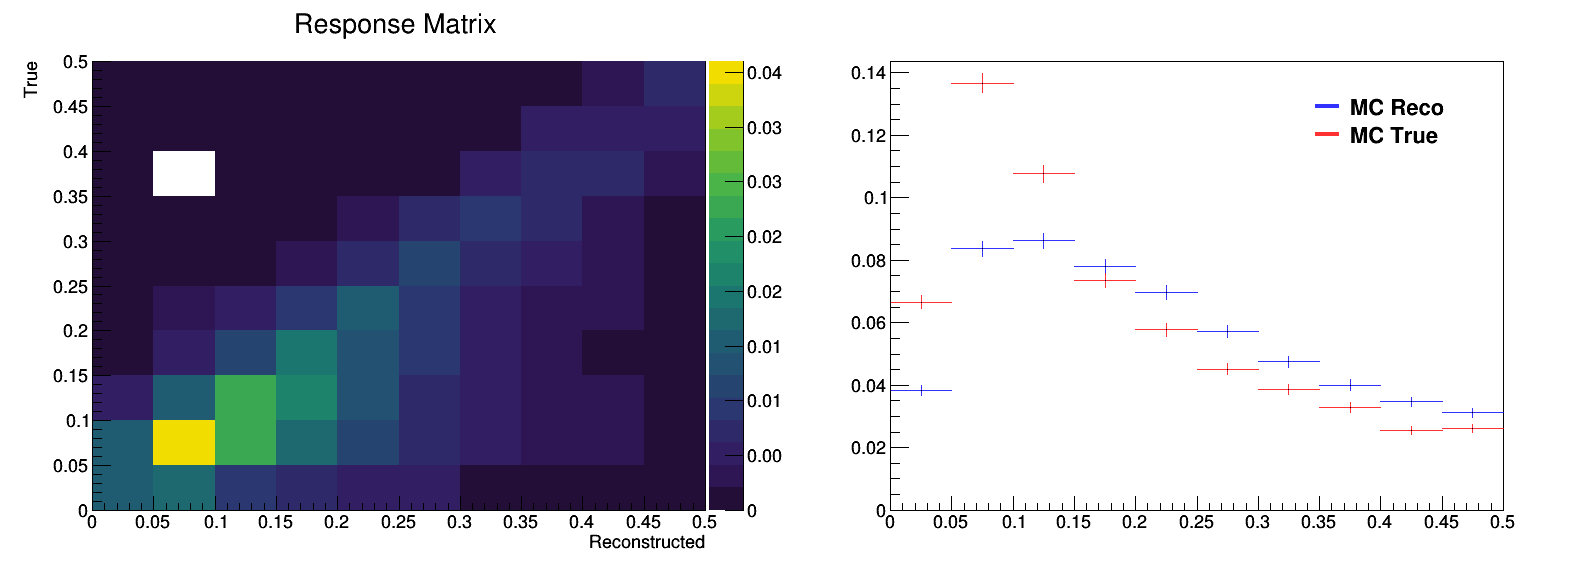

In [22]:
mc_truth = responseMatrix.ProjectionY()
mc_reco = responseMatrix.ProjectionX()
mc_truth.SetLineColorAlpha(2,0.8)
mc_reco.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(2)
c.cd(1)
responseMatrix.Draw('colz')
responseMatrix.SetTitle('Response Matrix; Reconstructed; True')

#ROOT.gPad.SetLogz()
c.cd(2)


label = Legend("")
label.Add(mc_reco,'MC Reco','L')
label.Add(mc_truth,'MC True','L')

hs_mc = ROOT.THStack()
hs_mc.Add(mc_reco)
hs_mc.Add(mc_truth)
hs_mc.Draw('nostack')
#hs_mc.SetTitle(axestitle[variable])

label.Draw(0.65,.87)
c.Draw()

In [23]:
#data_inputforunfolding = h_data.Clone()
data_inputforunfolding = h_fakedata.Clone()

response= RooUnfoldResponse(mc_reco, mc_truth, responseMatrix,"response","response")
#response.UseOverflow()

data_unfolded = {}
ErrorMatrices = {}
unfold = {}

nbayes_iter = 4
unfold['Bayes'] =  RooUnfoldBayes(response, data_inputforunfolding, nbayes_iter)
unfold['Bayes'].IncludeSystematics()


data_unfolded['Bayes'] = unfold['Bayes'].Hreco();
ErrorMatrices['Bayes'] = unfold['Bayes'].Ereco();


Now unfolding...
Iteration : 0
Chi^2 of change 1.23704
Iteration : 1
Chi^2 of change 0.753825
Iteration : 2
Chi^2 of change 0.54281
Iteration : 3
Chi^2 of change 0.42954
Calculating covariances due to number of measured events
Calculating covariance due to unfolding matrix...


In [24]:
for key in ['Bayes']:
    print '%%%%%%%%%%%%%%%%%%%%%% ', key
    print unfold[key].Chi2(mc_truth,0)
    print 'Option 1: use errors propagated through the unfolding'
    print unfold[key].Chi2(mc_truth,1)
    print 'Option 2: use covariance matrix returned from unfolding'
    print unfold[key].Chi2(mc_truth,2)
    print 'Option 3: use covariance matrix from the variation of the results in toy MC tests'
    print unfold[key].Chi2(mc_truth,3)

%%%%%%%%%%%%%%%%%%%%%%  Bayes
9334.96927777
Option 1: use errors propagated through the unfolding
6463.36738923
Option 2: use covariance matrix returned from unfolding
4079.8921725
Option 3: use covariance matrix from the variation of the results in toy MC tests
4183.87109761
covariance matrix condition=294.592, determinant=7.34341e+27, tolerance=2.22045e-16
Inverse covariance matrix 1.42109e-12% maximum error
Now unfolding...
Iteration : 0
Chi^2 of change 1.33599
Iteration : 1
Chi^2 of change 0.639308
Iteration : 2
Chi^2 of change 0.388404
Iteration : 3
Chi^2 of change 0.282045
Now unfolding...
Iteration : 0
Chi^2 of change 1.90268
Iteration : 1
Chi^2 of change 0.93738
Iteration : 2
Chi^2 of change 0.540065
Iteration : 3
Chi^2 of change 0.356586
Now unfolding...
Iteration : 0
Chi^2 of change 0.441661
Iteration : 1
Chi^2 of change 0.316836
Iteration : 2
Chi^2 of change 0.261768
Iteration : 3
Chi^2 of change 0.230557
Now unfolding...
Iteration : 0
Chi^2 of change 1.59989
Iteration : 1
C

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


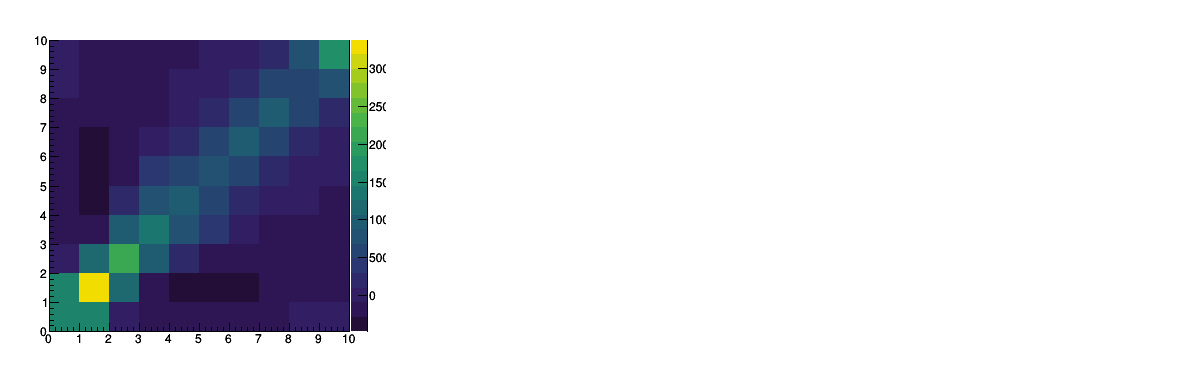

In [25]:
c = ROOT.TCanvas('c','c',1200,400)

c.Divide(3)
c.cd(1)
#print ErrorMatrices.GetMaximum()
ErrorMatrices['Bayes'].Draw("colz")
#ErrorMatrices['Bayes'].GetXaxis().SetTitle('; bin reco bin truth')
#c.cd(2)
#ErrorMatrices['SVD'].Draw("colz")
#c.cd(3)
#ErrorMatrices['IDS'].Draw("colz")

c.Draw()

In [26]:

def GetCorrelationMatrix ( cov, name):

    nrows= cov.GetNrows()
    ncolumns = cov.GetNcols()
    
    h= ROOT.TH2D (name, "", nrows, 0, nrows, ncolumns, 0, ncolumns);
    h.SetAxisRange (-1.0, 1.0, "Z")
    for i in range(nrows) :
        for j in range(ncolumns) :
            Viijj= cov(i,i)*cov(j,j)
            if Viijj>0.0: h.SetBinContent (i+1, j+1, cov(i,j)/ROOT.TMath.Sqrt(Viijj))
            
    return h

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


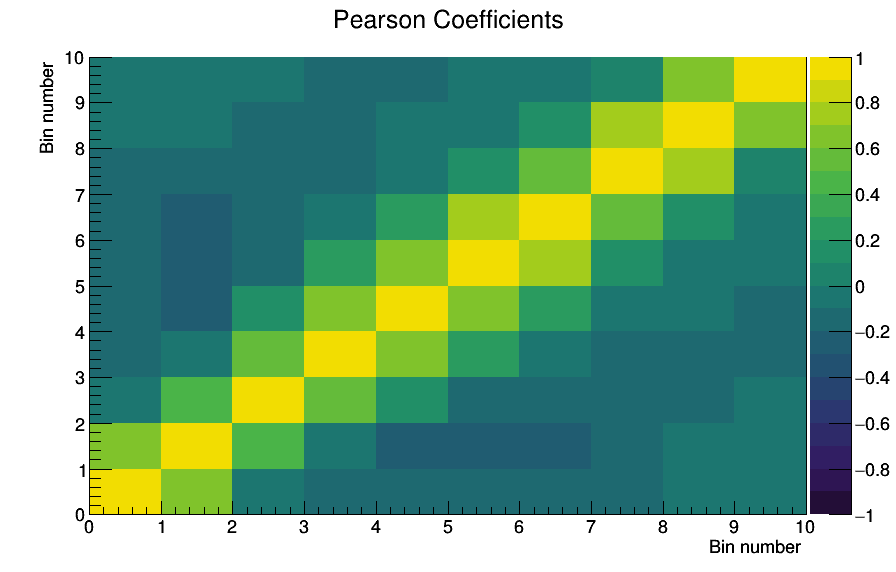

In [27]:

c = ROOT.TCanvas('c','c',900,600)
correlation = {}

correlation['Bayes'] = GetCorrelationMatrix(ErrorMatrices['Bayes'], 'Bayes')
correlation['Bayes'].Draw('colz')
#correlation['Bayes'].GetXaxis().SetRangeUser(1,7)
#correlation['Bayes'].GetYaxis().SetRangeUser(1,7)
correlation['Bayes'].GetXaxis().SetTitle('Bin number')
correlation['Bayes'].GetYaxis().SetTitle('Bin number')
correlation['Bayes'].SetTitle('Pearson Coefficients')

c.Draw()

Bayes   1   0.025  0.100  0.004
Bayes   2   0.075  0.212  0.006
Bayes   3   0.125  0.185  0.005
Bayes   4   0.175  0.126  0.004
Bayes   5   0.225  0.096  0.003
Bayes   6   0.275  0.074  0.003
Bayes   7   0.325  0.065  0.003
Bayes   8   0.375  0.055  0.003
Bayes   9   0.425  0.042  0.003
Bayes   10   0.475  0.044  0.005
[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475]
[0.09963142 0.21211812 0.18530412 0.12638284 0.09613959 0.07387974
 0.06481378 0.05542228 0.0421917  0.0441164 ]
[0.00412458 0.00622541 0.00500525 0.00390925 0.00346649 0.00312259
 0.00335387 0.00336521 0.00275012 0.00452781]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


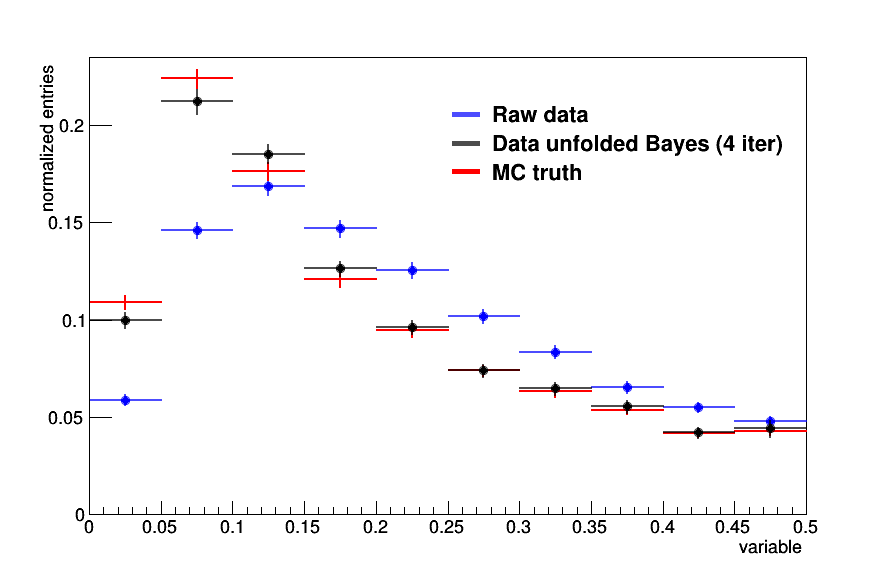

In [28]:
c = ROOT.TCanvas('c','c',900,600)

label = Legend("")
alpha = 0.7
hstack = ROOT.THStack()
h_data.SetLineWidth(2)
h_data.SetLineColorAlpha(4,alpha)
h_data.SetMarkerColor(4)
mc_truth.SetLineColor(2)
mc_truth.SetLineWidth(2)
mc_truth.SetMarkerColor(2)

h_data.SetMarkerStyle(20)

color = {}
color['Bayes'] = 1

data_unfolded[key].Scale(1.0/data_unfolded[key].Integral())
h_data.Scale(1.0/h_data.Integral())
mc_truth.Scale(1.0/mc_truth.Integral())


result_x = np.array([])
result_y = np.array([])
result_erry = np.array([])

for key in ['Bayes']:
    data_unfolded[key].SetMarkerStyle(20)
    data_unfolded[key].SetLineWidth(2)
    data_unfolded[key].SetLineColorAlpha(color[key],alpha)
    data_unfolded[key].SetMarkerColor(color[key])
    for i in range(1,data_unfolded[key].GetNbinsX()+1):
        print key, ' ' , i , ' ', data_unfolded[key].GetBinCenter(i), ' %2.3f'%data_unfolded[key].GetBinContent(i), ' %2.3f'%data_unfolded[key].GetBinError(i)
        result_x = np.append(result_x, data_unfolded[key].GetBinCenter(i))
        result_y = np.append(result_y, data_unfolded[key].GetBinContent(i))
        result_erry = np.append(result_erry, data_unfolded[key].GetBinError(i))
hstack.Add(h_data)
hstack.Add(mc_truth)
hstack.Add(data_unfolded['Bayes'])
label.Add(h_data, 'Raw data', 'L')
label.Add(data_unfolded['Bayes'],'Data unfolded Bayes (%i iter)'%nbayes_iter,'L')      
label.Add(mc_truth, 'MC truth', 'L')

hstack.SetTitle('; variable; normalized entries')
hstack.Draw('nostack')
hstack.GetYaxis().SetNdivisions(6)
label.Draw(.5,.85)

c.Draw()
print result_x
print result_y
print result_erry
#c.SaveAs('Unfoldedresult%s.pdf'%(datatype))

17.127508  mean lepton pt
0.37809396  mean inelasticity
20.853493  mean jet p
14.594749  mean jet pT
count    29316.000000
mean        14.594749
std          5.786974
min          5.000011
25%         10.167954
50%         14.656549
75%         18.230238
max         49.601570
Name: jet_pt, dtype: float64
0.0135342395  mean x
500.09366  mean Q2
count    29316.000000
mean       500.093658
std        153.255875
min        281.785370
25%        390.239647
50%        465.341583
75%        568.719543
max       1287.933350
Name: Q2, dtype: float64
###########


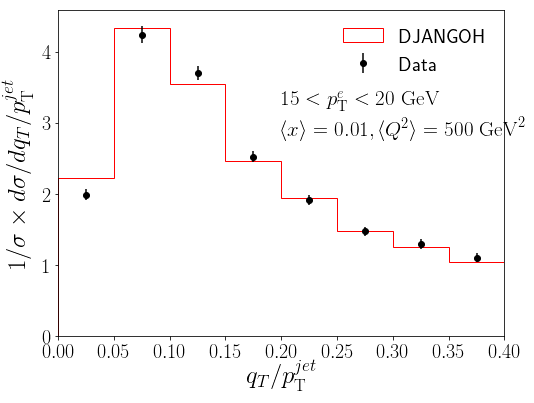

In [29]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(eptmin,eptmax))
printSummary(df_cut)
print '###########'
    
plt.hist(df_cut['genjet_qtnormjetpt'],bins=10,range=(0,0.5),normed=True,histtype='step',color='red',label='DJANGOH')    
#width = (result_x[1:]-result_x[:-1])
#result_y = np.divide(result_y,0.05)
plt.errorbar(x=result_x,y=np.divide(result_y,0.05), yerr=np.divide(result_erry,0.05), fmt='o',ls='none',label='Data',color='black')

plt.xlabel(r'$q_{T}/p_{\mathrm{T}}^{jet}$', fontsize=25)
plt.ylabel(r'$1/\sigma \times d\sigma/d q_{T}/p_{\mathrm{T}}^{jet}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)

plt.text(0.20,2.8, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(eptmin,eptmax) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=21)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.xlim(0,0.4)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
#plt.legend(loc='best',frameon=False)
plt.savefig('qtplot.png', bbox_inches='tight')
plt.savefig('qtplot.pdf', bbox_inches='tight')

## Closure test: feed pseudodata (MC) to the unfolding and test whether it is compatible with the truth distribution

In [36]:
#data_inputforunfolding = h_data.Clone()
data_inputforunfolding = h_fakedata.Clone()

response= RooUnfoldResponse(mc_reco, mc_truth, responseMatrix,"response","response")
#response.UseOverflow()

nbayes_iter = 3
closure = RooUnfoldBayes(response, data_inputforunfolding, nbayes_iter).Hreco();


Now unfolding...
Iteration : 0
Chi^2 of change 2.02592
Iteration : 1
Chi^2 of change 1.23455
Iteration : 2
Chi^2 of change 0.888965
Calculating covariances due to number of measured events


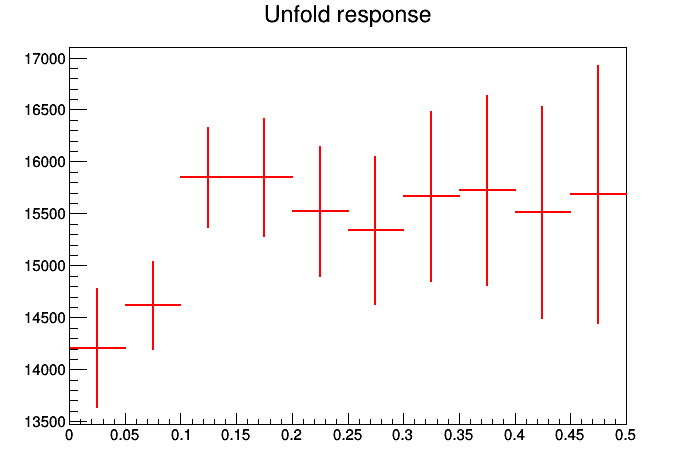

In [37]:
closure.Divide(mc_truth)
c = ROOT.TCanvas()
closure.Draw()
c.Draw()